# 기본 준비

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import Binarizer

In [ ]:
# 오차행렬 및 평가지표 출력
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


# 임계값 조정
def get_eval_by_threshold(y_test, pred, pred_proba_c1, thresholds):
    pred_proba_c1 = pred_proba_c1.reshape(-1, 1)
    for custom_threshold in thresholds:
        bina = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = bina.transform(pred_proba_c1)
        print('분류 임계값 :', custom_threshold)
        get_clf_eval(y_test, pred, custom_predict)
    

# precision recall curve 그리기
def precision_recall_curve_plot(y_test, pred_proba_c1): 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]

    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision') 
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')

    start, end = plt.xlim() # X축 범위 반환
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [ ]:
brfss = pd.read_csv("../data/brfss.csv")
checkup = pd.read_csv("../data/checkup.csv")

### 데이터 분할

In [ ]:
# X = brfss.drop(["HEARTDISEASE"], axis=1)
X = brfss.drop(["HEARTDISEASE", "ALCOHOL"], axis=1)
y = brfss["HEARTDISEASE"]

In [ ]:
y.value_counts()

0.0    358424
1.0     20222
Name: HEARTDISEASE, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# scaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# smote
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

0.0    286685
1.0    286685
Name: HEARTDISEASE, dtype: int64

# 할 일
- 하이퍼 파라미터 튜닝
    - 각 모델 document 보면서 찾아보기
- 임계점 변경
    - 변경해보면서 최적값 찾기

# 박민정

## DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 임계값 조정 예시
thresholds = [0.5, 0.55, 0.6]
get_eval_by_threshold(y_test, pred, pred_proba, thresholds)

0.7110940579381552
0.6567014393239139
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.7696
분류 임계값 : 0.5
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.7056
분류 임계값 : 0.55
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.7048
분류 임계값 : 0.6
오차 행렬
[[46698 25041]
 [  957  3034]]
정확도: 0.6567, 정밀도: 0.1081, 재현율: 0.7602, F1: 0.1892, AUC:0.6923


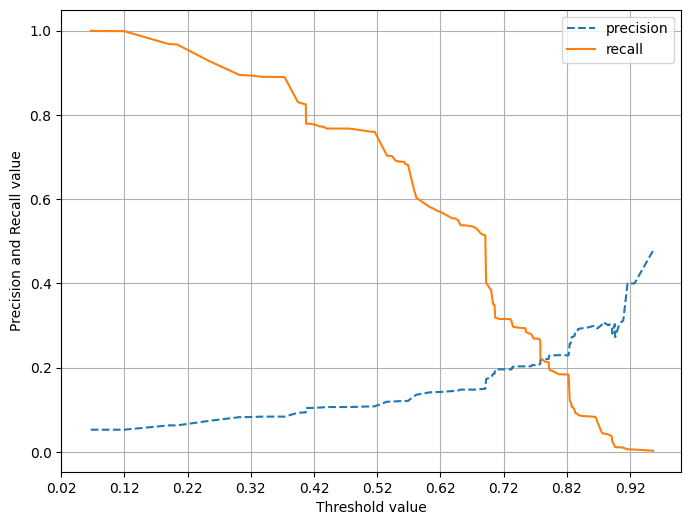

In [ ]:
# 임계값 그래프
precision_recall_curve_plot(y_test, pred_proba)

## SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="log_loss", max_iter=10)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

0.7078343826848283
0.6706589198468242
오차 행렬
[[47835 23904]
 [ 1037  2954]]
정확도: 0.6707, 정밀도: 0.1100, 재현율: 0.7402, F1: 0.1915, AUC:0.7691


## SVM

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

# 서대훈

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-2.8939165652334635

## LightGBM 

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

0.7105471419208189
0.656410933579823
오차 행렬
[[46554 25034]
 [  986  3156]]
정확도: 0.6564, 정밀도: 0.1120, 재현율: 0.7620, F1: 0.1952, AUC:0.7700


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

0.7105211755924352
0.6586293410801531
오차 행렬
[[46843 24883]
 [  969  3035]]
정확도: 0.6586, 정밀도: 0.1087, 재현율: 0.7580, F1: 0.1902, AUC:0.7665


# 손지호

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[47869 23870]
 [ 1042  2949]]
정확도: 0.6710, 정밀도: 0.1100, 재현율: 0.7389, F1: 0.1914, AUC:0.7695


## XGBClassifier

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

0.7105453987644508
0.6563977287732735
오차 행렬
[[46552 25036]
 [  985  3157]]
정확도: 0.6564, 정밀도: 0.1120, 재현율: 0.7622, F1: 0.1953, AUC:0.7698


## KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)